# Compare Rbf SVM vs Linear SVM vs PCA+Rbf SVM

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline

## Loading the Digits Dataset

In [2]:
#Local
initialized = False
if not initialized:
    try:
        train = pd.read_csv("./input/train.csv")
        test = pd.read_csv("./input/test.csv")

        train_labels_df, train_images_df = train[['label']], train.iloc[:, 1:]
        test_images_df = test.iloc[:, 0:]
        initData = True
    except Exception as e:
        print(e)

In [3]:
#Colab
#!pip install -q mnist
if not initialized:
    try:
        import mnist
        print(mnist.__version__)

        train_images = mnist.train_images()
        train_labels = mnist.train_labels()
        test_images = mnist.test_images()
        test_labels = mnist.test_labels()
        print((train_images.shape, train_labels.shape, test_images.shape,
               test_labels.shape))

        train_images_df = pd.DataFrame(
            train_images.reshape(
                (train_images.shape[0],
                 train_images.shape[1] * train_images.shape[2])))
        train_labels_df = pd.DataFrame(train_labels)
        test_images_df = pd.DataFrame(
            test_images.reshape((test_images.shape[0],
                                 test_images.shape[1] * test_images.shape[2])))
        test_labels_df = pd.DataFrame(test_labels)
        initData = True
    except Exception as e:
        print(e)

No module named 'mnist'


### Check for null and missing values

In [4]:
train_images_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test_images_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

### Split data

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    train_images_df, train_labels_df, test_size=0.25, random_state=40)

### Show digit data as graph 

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


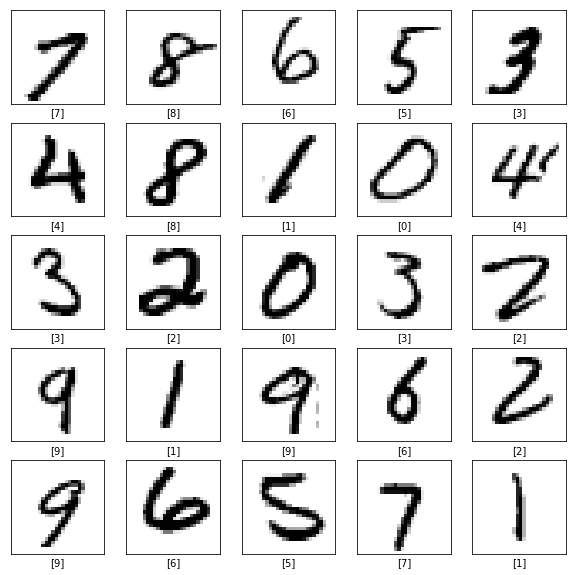

In [7]:
image_size = int(x_train.shape[1]**.5)

plt.figure(figsize=(10, 10))
plt.gray()
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(
        x_train.values[i].reshape((image_size, image_size)),
        cmap=plt.cm.binary)
    plt.xlabel(y_train.values[i])

plt.show()

In [8]:
size = 4000  # the libsvm time performace O(n^2). the max n=20000
x_train1, y_train1 = x_train.iloc[0:size, :], y_train.iloc[0:size, :]

## The Rbf SVM

In [9]:
from sklearn.svm import SVC

rbf_clf = SVC(C=10, kernel='rbf', gamma='scale', decision_function_shape='ovo')
rbf_clf.fit(x_train1, y_train1)  # 训练SVM
rbf_clf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.10761904761904761

## The Linear SVM

In [10]:
from sklearn.svm import LinearSVC

linear_clf = LinearSVC()
linear_clf.fit(x_train1, y_train1)  # 训练SVM
linear_clf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8214285714285714

In [11]:
lin_clf = SVC(C=10, kernel='linear', decision_function_shape='ovo')
lin_clf.fit(x_train1, y_train1)  # 训练SVM
lin_clf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8911428571428571

## The Poly SVM

In [12]:
poly_clf = SVC(C=10, kernel='poly', decision_function_shape='ovr')
poly_clf.fit(x_train1, y_train1)  # 训练SVM
poly_clf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9306666666666666

## The PCA + Rbf SVM

In [13]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, whiten=True)
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)

#print('explained_variance_', pca.explained_variance_, '\nexplained_variance_ratio_', pca.explained_variance_ratio_, '\nn_components_', pca.n_components_)
print('sum of explained_variance_ratio_', sum(pca.explained_variance_ratio_))
print(pca_train.shape, pca_test.shape)
pca_train1 = pca_train[0:size, :]

sum of explained_variance_ratio_ 0.9007457718763443
(31500, 87) (10500, 87)


In [14]:
pca_clf = SVC(C=10, kernel='rbf', decision_function_shape='ovr')
pca_clf.fit(pca_train1, y_train1)  # 训练SVM
pca_clf.score(pca_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9436190476190476

## Conclusions

SVC全称是C-Support Vector Classification，是一种基于libsvm的支持向量机，由于其时间复杂度为O(n^2)，所以当样本数量超过两万时难以实现。 

n为特征数，m为训练样本数。

1. 如果相较于m而言，n要大许多，即训练集数据量不够支持我们训练一个复杂的非线性模型，我们选用逻辑回归模型或者不带核函数的支持向量机。

2. 如果n较小，而且m大小中等，例如n在 1-1000 之间，而m在10-10000之间，使用高斯核函数的支持向量机。

3. 如果n较小，而m较大，例如n在1-1000之间，而m大于50000，则使用支持向量机会非常慢，解决方案是创造、增加更多的特征，然后使用逻辑回归或不带核函数的支持向量机。


**Rbf kernel SVM 模型原始数据训练正确率很低？？？**

In [15]:
from sklearn.metrics import classification_report

target_names = ['Digit-' + str(x) for x in range(0, 10)]

for clf in [rbf_clf, linear_clf, lin_clf, poly_clf]:
    clf_name = clf.__class__.__name__
    print(
        clf_name, ":\n",
        classification_report(
            clf.predict(x_test), y_test, target_names=target_names))

clf_name = pca_clf.__class__.__name__
print(
    clf_name, ":\n",
    classification_report(
        pca_clf.predict(pca_test), y_test, target_names=target_names))

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


SVC :
               precision    recall  f1-score   support

     Digit-0       0.00      0.00      0.00         0
     Digit-1       1.00      0.11      0.19     10500
     Digit-2       0.00      0.00      0.00         0
     Digit-3       0.00      0.00      0.00         0
     Digit-4       0.00      0.00      0.00         0
     Digit-5       0.00      0.00      0.00         0
     Digit-6       0.00      0.00      0.00         0
     Digit-7       0.00      0.00      0.00         0
     Digit-8       0.00      0.00      0.00         0
     Digit-9       0.00      0.00      0.00         0

   micro avg       0.11      0.11      0.11     10500
   macro avg       0.10      0.01      0.02     10500
weighted avg       1.00      0.11      0.19     10500

LinearSVC :
               precision    recall  f1-score   support

     Digit-0       0.94      0.87      0.90      1108
     Digit-1       0.97      0.91      0.94      1214
     Digit-2       0.80      0.81      0.80      1044
    

## Why Rbf kernel SVM score so low (score=0.1)???


[rbf parameters](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

    The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

    When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

    模型的行为对gamma参数非常敏感。如果 gamma太大，则支持向量的影响区域的半径仅包括支持向量本身，并且没有正规化量C将能够防止过度拟合。

    当gamma非常小时，模型太受限制并且无法捕获数据的复杂性或“形状”。任何选定支持向量的影响区域将包括整个训练集。得到的模型的行为类似于具有一组超平面的线性模型，这些超平面将任意一对两类的高密度中心分开。



In [16]:
rbf_clf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
def similarity(xi, lm, sigma):
    result = [np.exp((np.linalg.norm(l - xi, 2)**2) / (2 * (sigma**2))) for l in lm]
    result = [1] + result
    return result

def rbf_kernel(x, lm, sigma):
    return np.asarray([similarity(xi, lm, sigma) for xi in x])

In [18]:
# Rbf kernel transform
m = x_train1.shape[1]
lm = x_train1.values[0:m]
rbf_train1 = rbf_kernel(x_train1.values[m:], lm, 10000)
pd.DataFrame(rbf_train1).shape

(3216, 785)

In [19]:
pd.DataFrame(rbf_train1).describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,3216.0,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,...,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000
mean,1.0,1.034805,1.032059,1.031788,1.031024,1.032816,1.039198,1.039017,1.031936,1.036925,...,1.039128,1.034629,1.056181,1.033398,1.043690,1.029149,1.032033,1.030288,1.031607,1.038919
std,0.0,0.008305,0.007213,0.007137,0.008745,0.009429,0.006945,0.008148,0.010218,0.006789,...,0.007293,0.006679,0.009841,0.010178,0.007418,0.010626,0.008547,0.010606,0.007895,0.006887
min,1.0,1.004134,1.013808,1.007605,1.010216,1.009451,1.012670,1.011008,1.002219,1.002847,...,1.011908,1.010859,1.010703,1.002845,1.016140,1.000734,1.006741,1.001684,1.008496,1.009235
25%,1.0,1.029037,1.026234,1.026937,1.024622,1.025806,1.034562,1.032994,1.025993,1.032494,...,1.034927,1.030268,1.051444,1.027261,1.038786,1.022629,1.025352,1.024030,1.026270,1.035061
50%,1.0,1.034319,1.031087,1.031116,1.029789,1.031296,1.039598,1.038779,1.032073,1.036537,...,1.039064,1.034217,1.058089,1.033361,1.044174,1.029095,1.030915,1.030402,1.030898,1.038571
75%,1.0,1.040248,1.036580,1.036062,1.036690,1.038540,1.044009,1.044492,1.038483,1.041091,...,1.043495,1.038574,1.063328,1.039782,1.048624,1.035975,1.037714,1.036926,1.036011,1.043045
max,1.0,1.064247,1.061299,1.063115,1.073147,1.067965,1.061760,1.073291,1.068872,1.063109,...,1.069038,1.060253,1.073891,1.071230,1.068605,1.069789,1.065955,1.067466,1.065056,1.066481


### Normalized

gamma参数敏感，可以通过原始数据预处理归一化后用默认的gamma参数，来解决

In [20]:
# normalized
# x_train1.std() # have zeros
# (x_train1.max()-x_train1.min()) # have zeros
normalized_train1 = (x_train1 - x_train1.mean()) / 255
normalized_test = (x_test - x_test.mean()) / 255

In [21]:
from sklearn.svm import SVC

normalized_rbf_clf = SVC(C=10, kernel='rbf', decision_function_shape='ovo') #gamma='scale', 
normalized_rbf_clf.fit(normalized_train1, y_train1)  # 训练SVM
normalized_rbf_clf.score(normalized_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9159047619047619

In [22]:
from sklearn.svm import SVC

normalized_rbf_clf = SVC(C=10, kernel='rbf', gamma='scale', decision_function_shape='ovo') #
normalized_rbf_clf.fit(normalized_train1, y_train1)  # 训练SVM
normalized_rbf_clf.score(normalized_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9379047619047619

### Grid search SVM suitable parameters C & gamma

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [24]:
# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
from sklearn.utils.validation import column_or_1d

size = 500
X, y = x_train[:size], y_train[:size]
y = column_or_1d(y, warn=True)

C_range = np.logspace(2, 14, 13)
gamma_range = np.logspace(-15, -3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((C, gamma, clf))


/Users/zhenglj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


The best parameters are {'C': 100.0, 'gamma': 1e-07} with a score of 0.87


In [25]:
best_rbf_clf = SVC(C=10, kernel='rbf', gamma=1e-07, decision_function_shape='ovo')
best_rbf_clf.fit(x_train1, y_train1)  # 训练SVM
best_rbf_clf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.942

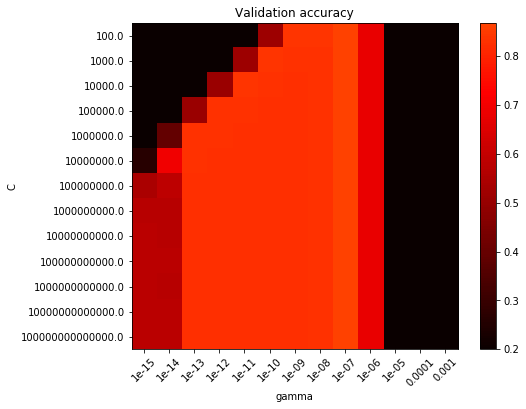

In [26]:
# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

plt.figure(figsize=(8, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()
